In [57]:
#Importing the libraries
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as dreader
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date

In [58]:
#plt style and pandas data reader making optional
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [59]:
# Extracting the data
stock_symbols = ['TATAMOTORS.NS']
start_date = date(2021,9,4)
end_date = date.today()

def getMyPortfolio(stocks = stock_symbols ,start = start_date , end = end_date):
    data = dreader.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data

In [60]:
data = getMyPortfolio(stock_symbols)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-06 00:00:00+05:30,297.500000,298.950012,296.000000,297.450012,297.450012,16622865
2021-09-07 00:00:00+05:30,297.350006,297.799988,290.899994,294.600006,294.600006,14325904
2021-09-08 00:00:00+05:30,293.500000,298.799988,291.600006,295.250000,295.250000,14920479
2021-09-09 00:00:00+05:30,294.000000,303.500000,293.549988,298.950012,298.950012,34020970
2021-09-13 00:00:00+05:30,299.000000,302.000000,295.500000,301.200012,301.200012,16339860
...,...,...,...,...,...,...
2022-10-04 00:00:00+05:30,406.000000,408.950012,402.899994,407.899994,407.899994,12761425
2022-10-06 00:00:00+05:30,409.600006,417.649994,409.500000,414.100006,414.100006,12771199
2022-10-07 00:00:00+05:30,413.399994,414.000000,408.700012,412.149994,412.149994,10670854


In [61]:
data['SMA 30'] = ta.sma(data['Close'], 30)
data['SMA 100'] = ta.sma(data['Close'],100)

In [62]:
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False
    
    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False:
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalSell.append(data['Adj Close'][i])
                signalBuy.append(np.nan)
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [63]:
data["Buy_Signal_Price"], data["Sell_Signal_Price"] = buy_sell(data)

In [64]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2021-09-06 00:00:00+05:30,297.500000,298.950012,296.000000,297.450012,297.450012,16622865,NaN,NaN,NaN,NaN
2021-09-07 00:00:00+05:30,297.350006,297.799988,290.899994,294.600006,294.600006,14325904,NaN,NaN,NaN,NaN
2021-09-08 00:00:00+05:30,293.500000,298.799988,291.600006,295.250000,295.250000,14920479,NaN,NaN,NaN,NaN
2021-09-09 00:00:00+05:30,294.000000,303.500000,293.549988,298.950012,298.950012,34020970,NaN,NaN,NaN,NaN
2021-09-13 00:00:00+05:30,299.000000,302.000000,295.500000,301.200012,301.200012,16339860,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-04 00:00:00+05:30,406.000000,408.950012,402.899994,407.899994,407.899994,12761425,437.996668,435.557,NaN,NaN
2022-10-06 00:00:00+05:30,409.600006,417.649994,409.500000,414.100006,414.100006,12771199,436.451668,435.655,NaN,NaN
2022-10-07 00:00:00+05:30,413.399994,414.000000,408.700012,412.149994,412.149994,10670854,434.750001,435.723,NaN,412.149994


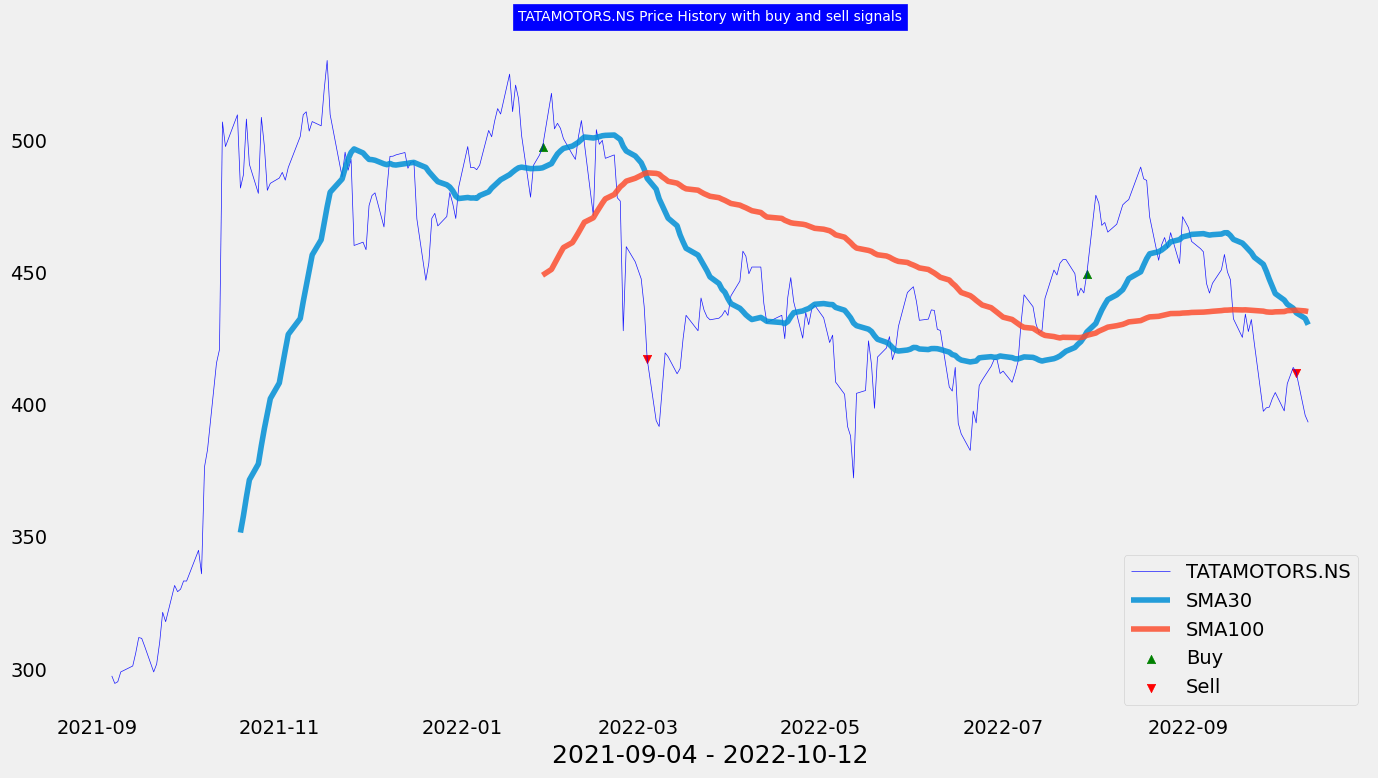

In [65]:
#visualization
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stock_symbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_Price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_Price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stock_symbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{start_date} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [66]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2021-09-06 00:00:00+05:30,297.500000,298.950012,296.000000,297.450012,297.450012,16622865,NaN,NaN,NaN,NaN
2021-09-07 00:00:00+05:30,297.350006,297.799988,290.899994,294.600006,294.600006,14325904,NaN,NaN,NaN,NaN
2021-09-08 00:00:00+05:30,293.500000,298.799988,291.600006,295.250000,295.250000,14920479,NaN,NaN,NaN,NaN
2021-09-09 00:00:00+05:30,294.000000,303.500000,293.549988,298.950012,298.950012,34020970,NaN,NaN,NaN,NaN
2021-09-13 00:00:00+05:30,299.000000,302.000000,295.500000,301.200012,301.200012,16339860,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-04 00:00:00+05:30,406.000000,408.950012,402.899994,407.899994,407.899994,12761425,437.996668,435.557,NaN,NaN
2022-10-06 00:00:00+05:30,409.600006,417.649994,409.500000,414.100006,414.100006,12771199,436.451668,435.655,NaN,NaN
2022-10-07 00:00:00+05:30,413.399994,414.000000,408.700012,412.149994,412.149994,10670854,434.750001,435.723,NaN,412.149994


In [67]:
#Defining MACD
macd = ta.macd(data['Close'], 15, 40)
macd

,MACD_15_40_9,MACDh_15_40_9,MACDs_15_40_9
Date,,,
2021-09-06 00:00:00+05:30,NaN,NaN,NaN
2021-09-07 00:00:00+05:30,NaN,NaN,NaN
2021-09-08 00:00:00+05:30,NaN,NaN,NaN
2021-09-09 00:00:00+05:30,NaN,NaN,NaN
2021-09-13 00:00:00+05:30,NaN,NaN,NaN
...,...,...,...
2022-10-04 00:00:00+05:30,-17.095876,-4.125367,-12.970509
2022-10-06 00:00:00+05:30,-16.479085,-2.806861,-13.672224
2022-10-07 00:00:00+05:30,-16.013867,-1.873314,-14.140553


In [68]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,MACD_15_40_9,MACDh_15_40_9,MACDs_15_40_9
Date,,,,,,,,,,,,,
2021-09-06 00:00:00+05:30,297.500000,298.950012,296.000000,297.450012,297.450012,16622865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-07 00:00:00+05:30,297.350006,297.799988,290.899994,294.600006,294.600006,14325904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-08 00:00:00+05:30,293.500000,298.799988,291.600006,295.250000,295.250000,14920479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-09 00:00:00+05:30,294.000000,303.500000,293.549988,298.950012,298.950012,34020970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:00:00+05:30,299.000000,302.000000,295.500000,301.200012,301.200012,16339860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04 00:00:00+05:30,406.000000,408.950012,402.899994,407.899994,407.899994,12761425,437.996668,435.557,NaN,NaN,-17.095876,-4.125367,-12.970509
2022-10-06 00:00:00+05:30,409.600006,417.649994,409.500000,414.100006,414.100006,12771199,436.451668,435.655,NaN,NaN,-16.479085,-2.806861,-13.672224
2022-10-07 00:00:00+05:30,413.399994,414.000000,408.700012,412.149994,412.149994,10670854,434.750001,435.723,NaN,412.149994,-16.013867,-1.873314,-14.140553


In [69]:
# Macd Strategy
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_15_40_9'][i] > df['MACDs_15_40_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_15_40_9'][i] < df['MACDs_15_40_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [70]:
MACD_strategy = MACD_Strategy(data, 0.025)
data.head(5)

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,MACD_15_40_9,MACDh_15_40_9,MACDs_15_40_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price
Date,,,,,,,,,,,,,,,
2021-09-06 00:00:00+05:30,297.500000,298.950012,296.000000,297.450012,297.450012,16622865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-07 00:00:00+05:30,297.350006,297.799988,290.899994,294.600006,294.600006,14325904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-08 00:00:00+05:30,293.500000,298.799988,291.600006,295.250000,295.250000,14920479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-09 00:00:00+05:30,294.000000,303.500000,293.549988,298.950012,298.950012,34020970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:00:00+05:30,299.000000,302.000000,295.500000,301.200012,301.200012,16339860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# For Histogram
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_15_40_9'][i] > data['MACDh_15_40_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

In [73]:
data['positive'] = MACD_color(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,MACD_15_40_9,MACDh_15_40_9,MACDs_15_40_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,,,
2021-09-06 00:00:00+05:30,297.500000,298.950012,296.000000,297.450012,297.450012,16622865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-09-07 00:00:00+05:30,297.350006,297.799988,290.899994,294.600006,294.600006,14325904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-09-08 00:00:00+05:30,293.500000,298.799988,291.600006,295.250000,295.250000,14920479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-09-09 00:00:00+05:30,294.000000,303.500000,293.549988,298.950012,298.950012,34020970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-09-13 00:00:00+05:30,299.000000,302.000000,295.500000,301.200012,301.200012,16339860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04 00:00:00+05:30,406.000000,408.950012,402.899994,407.899994,407.899994,12761425,437.996668,435.557,NaN,NaN,-17.095876,-4.125367,-12.970509,NaN,NaN,True
2022-10-06 00:00:00+05:30,409.600006,417.649994,409.500000,414.100006,414.100006,12771199,436.451668,435.655,NaN,NaN,-16.479085,-2.806861,-13.672224,NaN,NaN,True
2022-10-07 00:00:00+05:30,413.399994,414.000000,408.700012,412.149994,412.149994,10670854,434.750001,435.723,NaN,412.149994,-16.013867,-1.873314,-14.140553,NaN,NaN,True


C:\Users\along\AppData\Local\Temp\ipykernel_19220\2363051662.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)


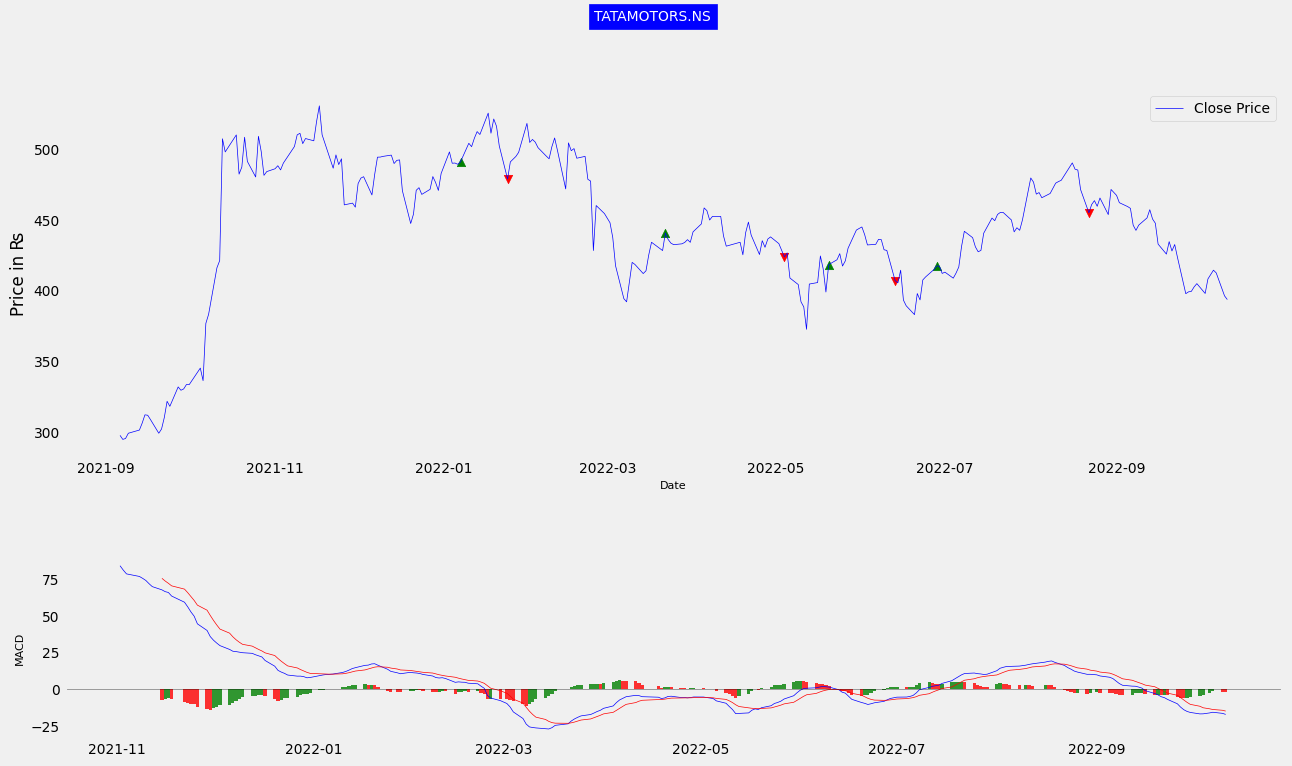

In [74]:
#Visualization MACD Strategy with previous data:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stock_symbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_15_40_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_15_40_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_15_40_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()


In [75]:
# Bollinger band Strategy
bb = ta.bbands(data['Adj Close'], length=30,std=2)
data = pd.concat([data, bb], axis=1).reindex(data.index)

In [77]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False

    for i in range(len(data)):
        if data['Adj Close'][i] < data['BBL_30_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBU_30_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

In [78]:
data = bb_strategy(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,...,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-06 00:00:00+05:30,297.500000,298.950012,296.000000,297.450012,297.450012,16622865,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-07 00:00:00+05:30,297.350006,297.799988,290.899994,294.600006,294.600006,14325904,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-08 00:00:00+05:30,293.500000,298.799988,291.600006,295.250000,295.250000,14920479,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-09 00:00:00+05:30,294.000000,303.500000,293.549988,298.950012,298.950012,34020970,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:00:00+05:30,299.000000,302.000000,295.500000,301.200012,301.200012,16339860,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04 00:00:00+05:30,406.000000,408.950012,402.899994,407.899994,407.899994,12761425,437.996668,435.557,NaN,NaN,...,NaN,NaN,True,390.439389,437.996668,485.553948,21.715818,0.183574,NaN,NaN
2022-10-06 00:00:00+05:30,409.600006,417.649994,409.500000,414.100006,414.100006,12771199,436.451668,435.655,NaN,NaN,...,NaN,NaN,True,388.900996,436.451668,484.002341,21.789662,0.264970,NaN,NaN
2022-10-07 00:00:00+05:30,413.399994,414.000000,408.700012,412.149994,412.149994,10670854,434.750001,435.723,NaN,412.149994,...,NaN,NaN,True,387.497169,434.750001,482.002833,21.737933,0.260861,NaN,NaN


C:\Users\along\AppData\Local\Temp\ipykernel_19220\2685585107.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)


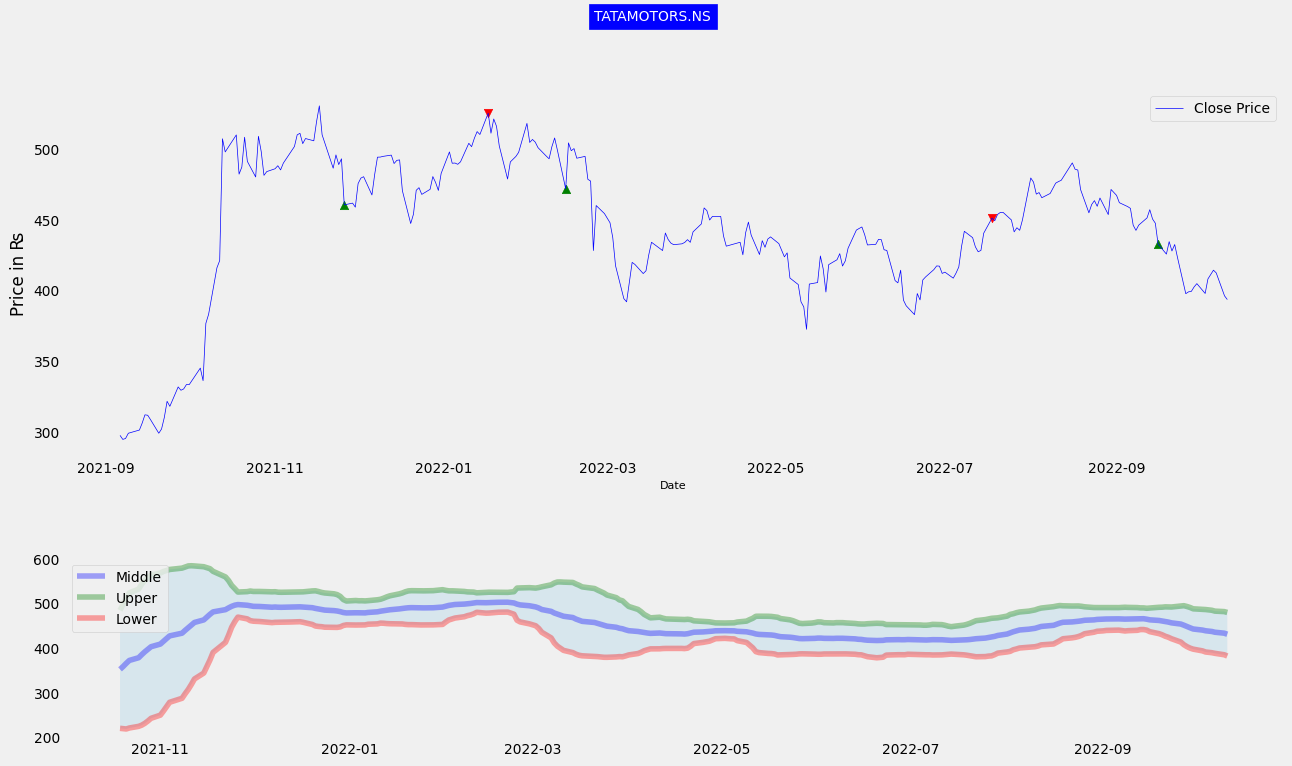

In [79]:
# Visualization
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stock_symbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_30_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_30_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_30_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_30_2.0'], data['BBU_30_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()